# Data Exploration

## Dataset characteristics and Findings
- Im using the Mobile Device Usage and User Behavior Dataset that aims at Analyzing Mobile Usage Patterns and User Behavior Classification Across Devices
- The dataset have 700 rows 11 columns and contains no missing values. 
- It provides a comprehensive analysis of mobile device usage patterns and user behavior classification. It contains 700 samples of user data, including metrics such as app usage time, screen-on time, battery drain, and data consumption. Each entry is categorized into one of five user behavior classes, ranging from light to extreme usage, allowing for insightful analysis and modeling.
- Key Features:

    - User ID: Unique identifier for each user.
    - Device Model: Model of the user's smartphone.
    - Operating System: The OS of the device (iOS or Android).
    - App Usage Time: Daily time spent on mobile applications, measured in minutes.
    - Screen On Time: Average hours per day the screen is active.
    - Battery Drain: Daily battery consumption in mAh.
    - Number of Apps Installed: Total apps available on the device.
    - Data Usage: Daily mobile data consumption in megabytes.
    - Age: Age of the user.
    - Gender: Gender of the user (Male or Female).
    - User Behavior Class: Classification of user behavior based on usage patterns (1 to 5).

- Key exploration findings
    - The dataset have a good class balance
    - Device Model and Gender features are well balanced but Operating System is unbalanced toward Android users.
    - None of the numerical Features have a normal distribution.
    - Age is not correlated to any other numerical features or the target class.  
    - The other numerical Features are very correlated to each other r is in [0.947, 0.981]
    - There is an obvious relationship between Device Model and Operating System categorical Features  
    - There is no relationship between the categorical features and the target class.
    - We can see that classes are very well clustered making the classification easier.

In [1]:
from kagglehub import dataset_download
from constants import KaggleConstants
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns 
from scipy import stats
import numpy as np

data_location = dataset_download(KaggleConstants.MOBILE_DATASET_HANDLE)

df = pd.read_csv(Path(data_location) / KaggleConstants.MOBILE_DATASET_FILE_NAME)
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [2]:
df.shape

(700, 11)

In [3]:
df.describe(include='all')

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
count,700.00000,700,700,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700,700.000000
unique,NaN,5,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Xiaomi Mi 11,Android,NaN,NaN,NaN,NaN,NaN,NaN,Male,NaN
freq,NaN,146,554,NaN,NaN,NaN,NaN,NaN,NaN,364,NaN
mean,350.50000,NaN,NaN,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,NaN,2.990000
std,202.21688,NaN,NaN,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,NaN,1.401476
min,1.00000,NaN,NaN,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,NaN,1.000000
25%,175.75000,NaN,NaN,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,NaN,2.000000
50%,350.50000,NaN,NaN,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,NaN,3.000000
75%,525.25000,NaN,NaN,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,NaN,4.000000


In [4]:
df.isna().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

There is no missing values

In [5]:
df.dtypes

User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

## Target Class Analysis

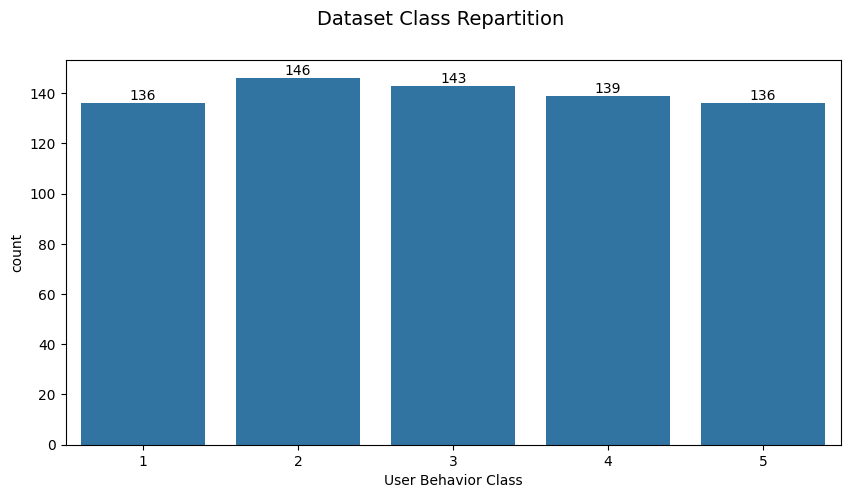

In [6]:
fig = plt.figure(figsize=(10, 5))
ax = sns.countplot(data = df, x='User Behavior Class')
ax.bar_label(ax.containers[0])

fig.add_axes(ax)
fig.suptitle('Dataset Class Repartition', fontsize=14)
plt.show()

The dataset have a good class balance

## Categorical Feature Analysis

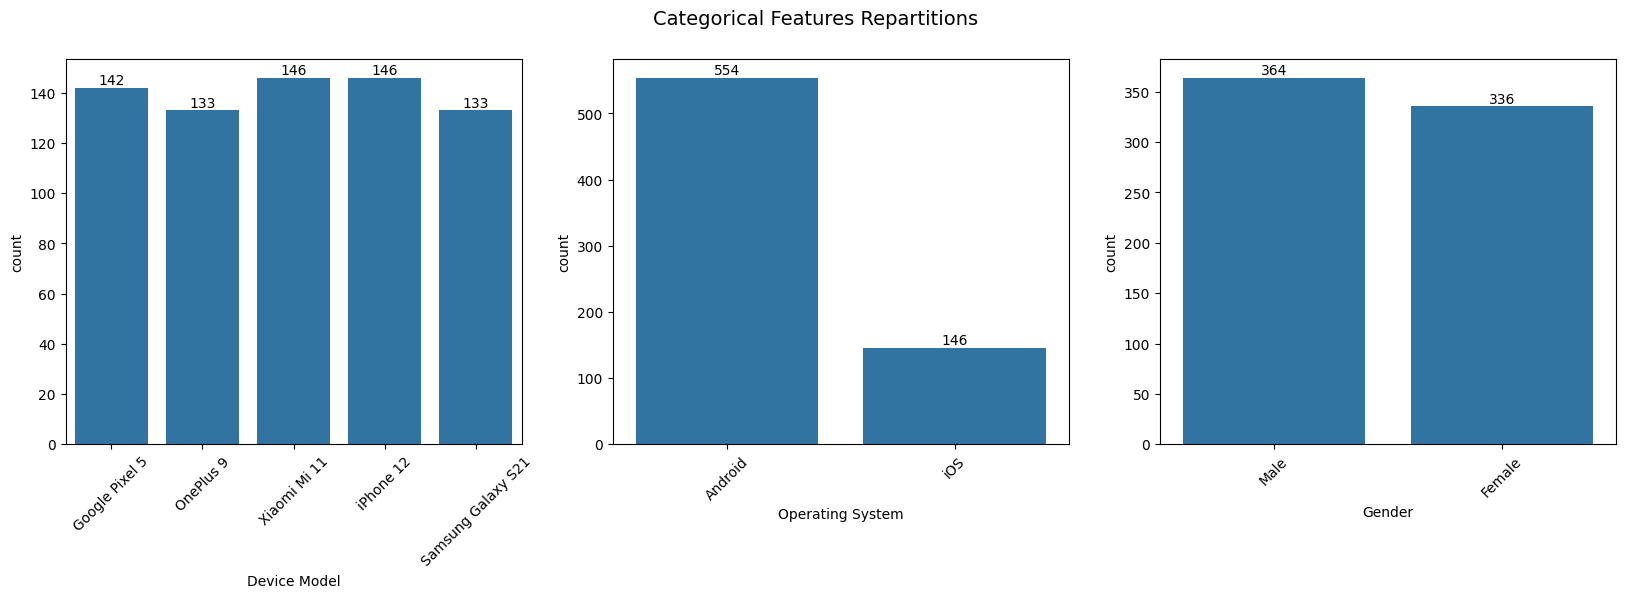

In [7]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 5))

sns.countplot(data=df, x='Device Model', ax=axs[0])
sns.countplot(data=df, x='Operating System', ax=axs[1])
sns.countplot(data=df, x='Gender', ax=axs[2])

for ax in axs: 
    ax.tick_params(axis='x', labelrotation=45)
    ax.bar_label(ax.containers[0])  

fig.suptitle('Categorical Features Repartitions', fontsize=14)
plt.show()

Device Model and Gender features are well balanced but Operating System is unbalanced toward Android users.

## Numerical Feature Analysis

In [8]:
numeric_col_names = [
    'App Usage Time (min/day)',
    'Screen On Time (hours/day)',
    'Battery Drain (mAh/day)',
    'Number of Apps Installed',
    'Data Usage (MB/day)',
    'Age'
]


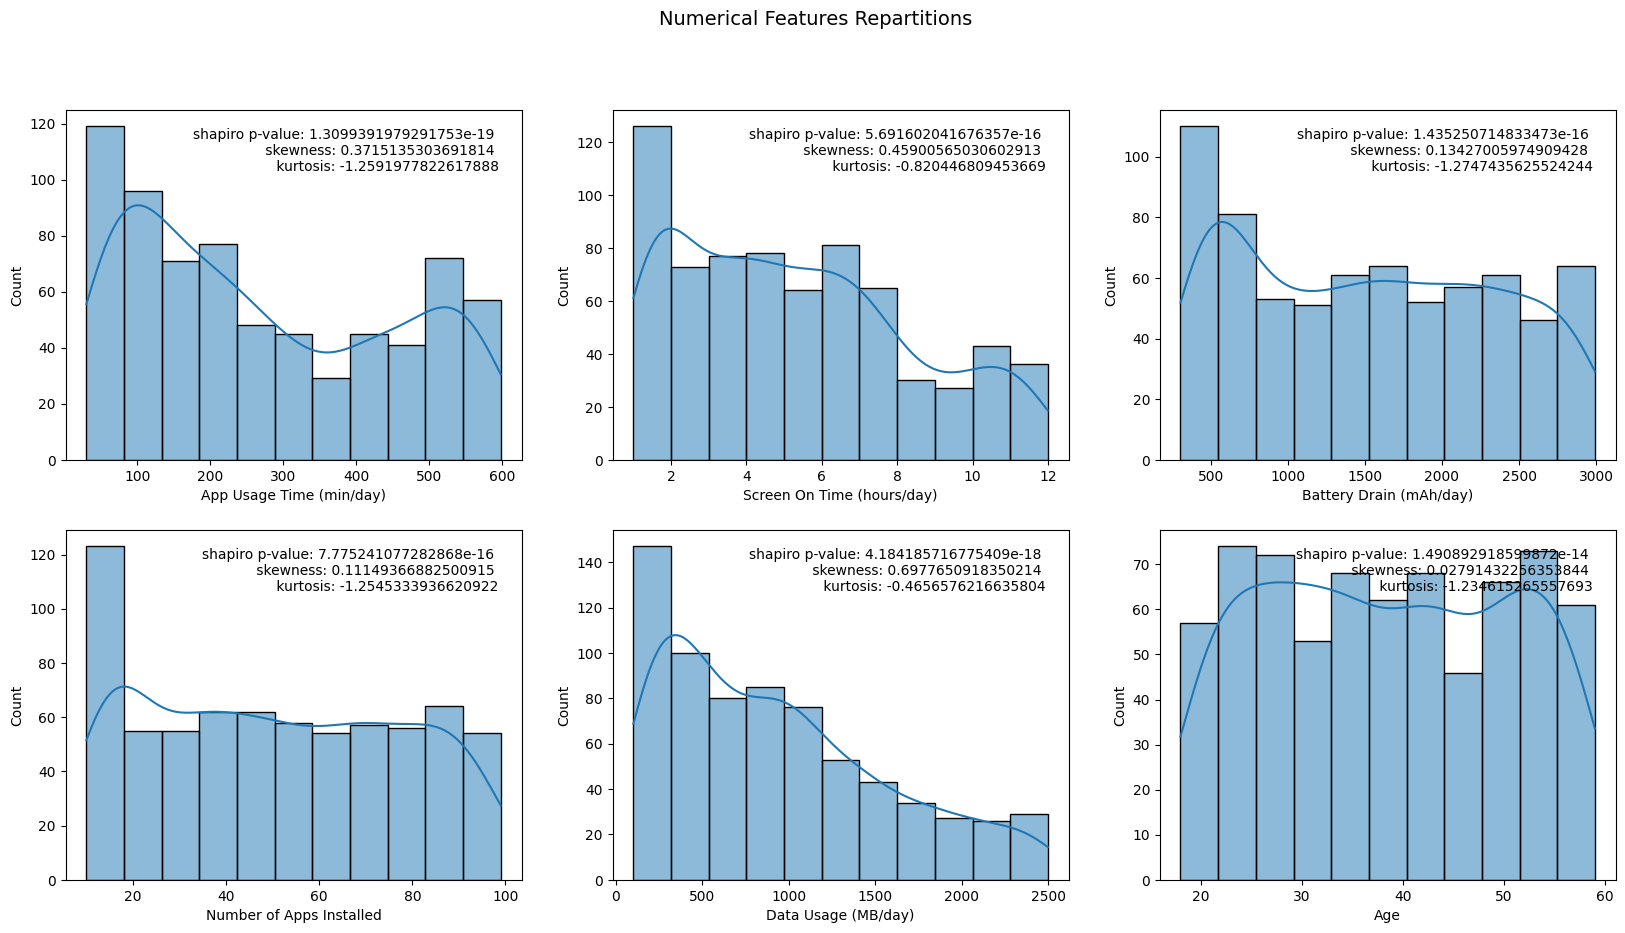

In [9]:
n_cols = 3
n_rows = 2
fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(20, 10))
for i in range(n_rows):
    for j in range(n_cols): 
        col_name = numeric_col_names[i*n_cols+j]
        
        test_stat, p_value = stats.shapiro(df[col_name])
        data_skewness = stats.skew(df[col_name])
        data_kurtosis = stats.kurtosis(df[col_name]) 

        text_to_plot = f'shapiro p-value: {p_value} \n skewness: {data_skewness} \n kurtosis: {data_kurtosis}'

        sns.histplot(data = df, x=col_name, kde=True, ax = axs[i][j])
        axs[i][j].text(
            x=0.95, y=0.95,               # Relative Coordinates for the text
            s=text_to_plot,        
            horizontalalignment='right',  # Align text to the right
            verticalalignment='top',      # Align text to the top
            transform=axs[i][j].transAxes       # Use relative coordinates to the axes
        )

fig.suptitle('Numerical Features Repartitions', fontsize=14)
plt.show()


None of the numerical Features have a normal distribution.

## Correlation Analysis

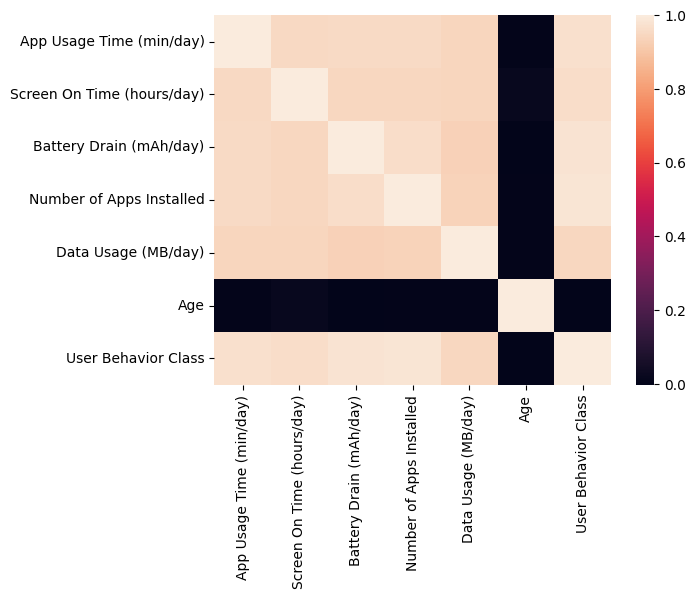

In [10]:
target_col_name = 'User Behavior Class'

sns.heatmap(
    df[numeric_col_names + [target_col_name]].corr()
)
plt.show()

In [11]:
df[numeric_col_names + [target_col_name]].corr()[target_col_name].sort_values()


Age                          -0.000563
Data Usage (MB/day)           0.946734
Screen On Time (hours/day)    0.964581
App Usage Time (min/day)      0.970498
Battery Drain (mAh/day)       0.978587
Number of Apps Installed      0.981255
User Behavior Class           1.000000
Name: User Behavior Class, dtype: float64

Age is not correlated to any other numerical features or the target class.  
The other numerical Features are very correlated to each other r is in [0.947, 0.981]

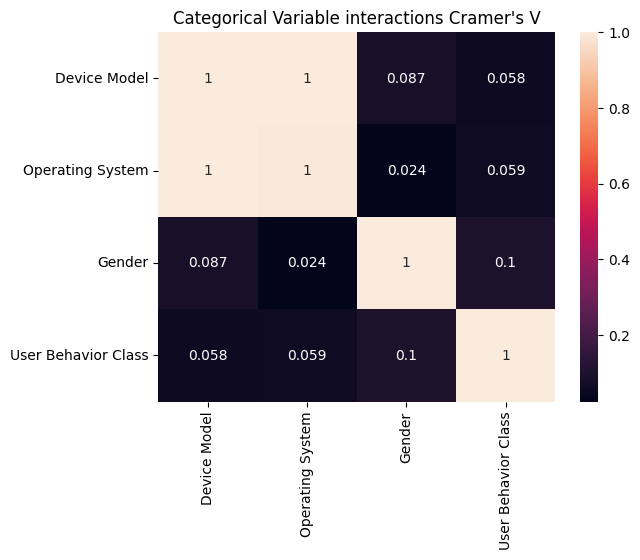

In [13]:
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

target_col_name = 'User Behavior Class'

categorical_col_names = [
    'Device Model',
    'Operating System',
    'Gender', 
    target_col_name
]

n = len(categorical_col_names)
cramers_v_matrix = pd.DataFrame(np.zeros((n, n)), index=categorical_col_names, columns=categorical_col_names)
p_values = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        cramers_v_matrix.iloc[i, j] = cramers_v(df[categorical_col_names[i]], df[categorical_col_names[j]])


sns.heatmap(cramers_v_matrix, annot=True)
plt.title("Categorical Variable interactions Cramer's V")
plt.show()


There is an obvious relationship between Device Model and Operating System categorical Features  
There is no relationship between the categorical features and the target class.

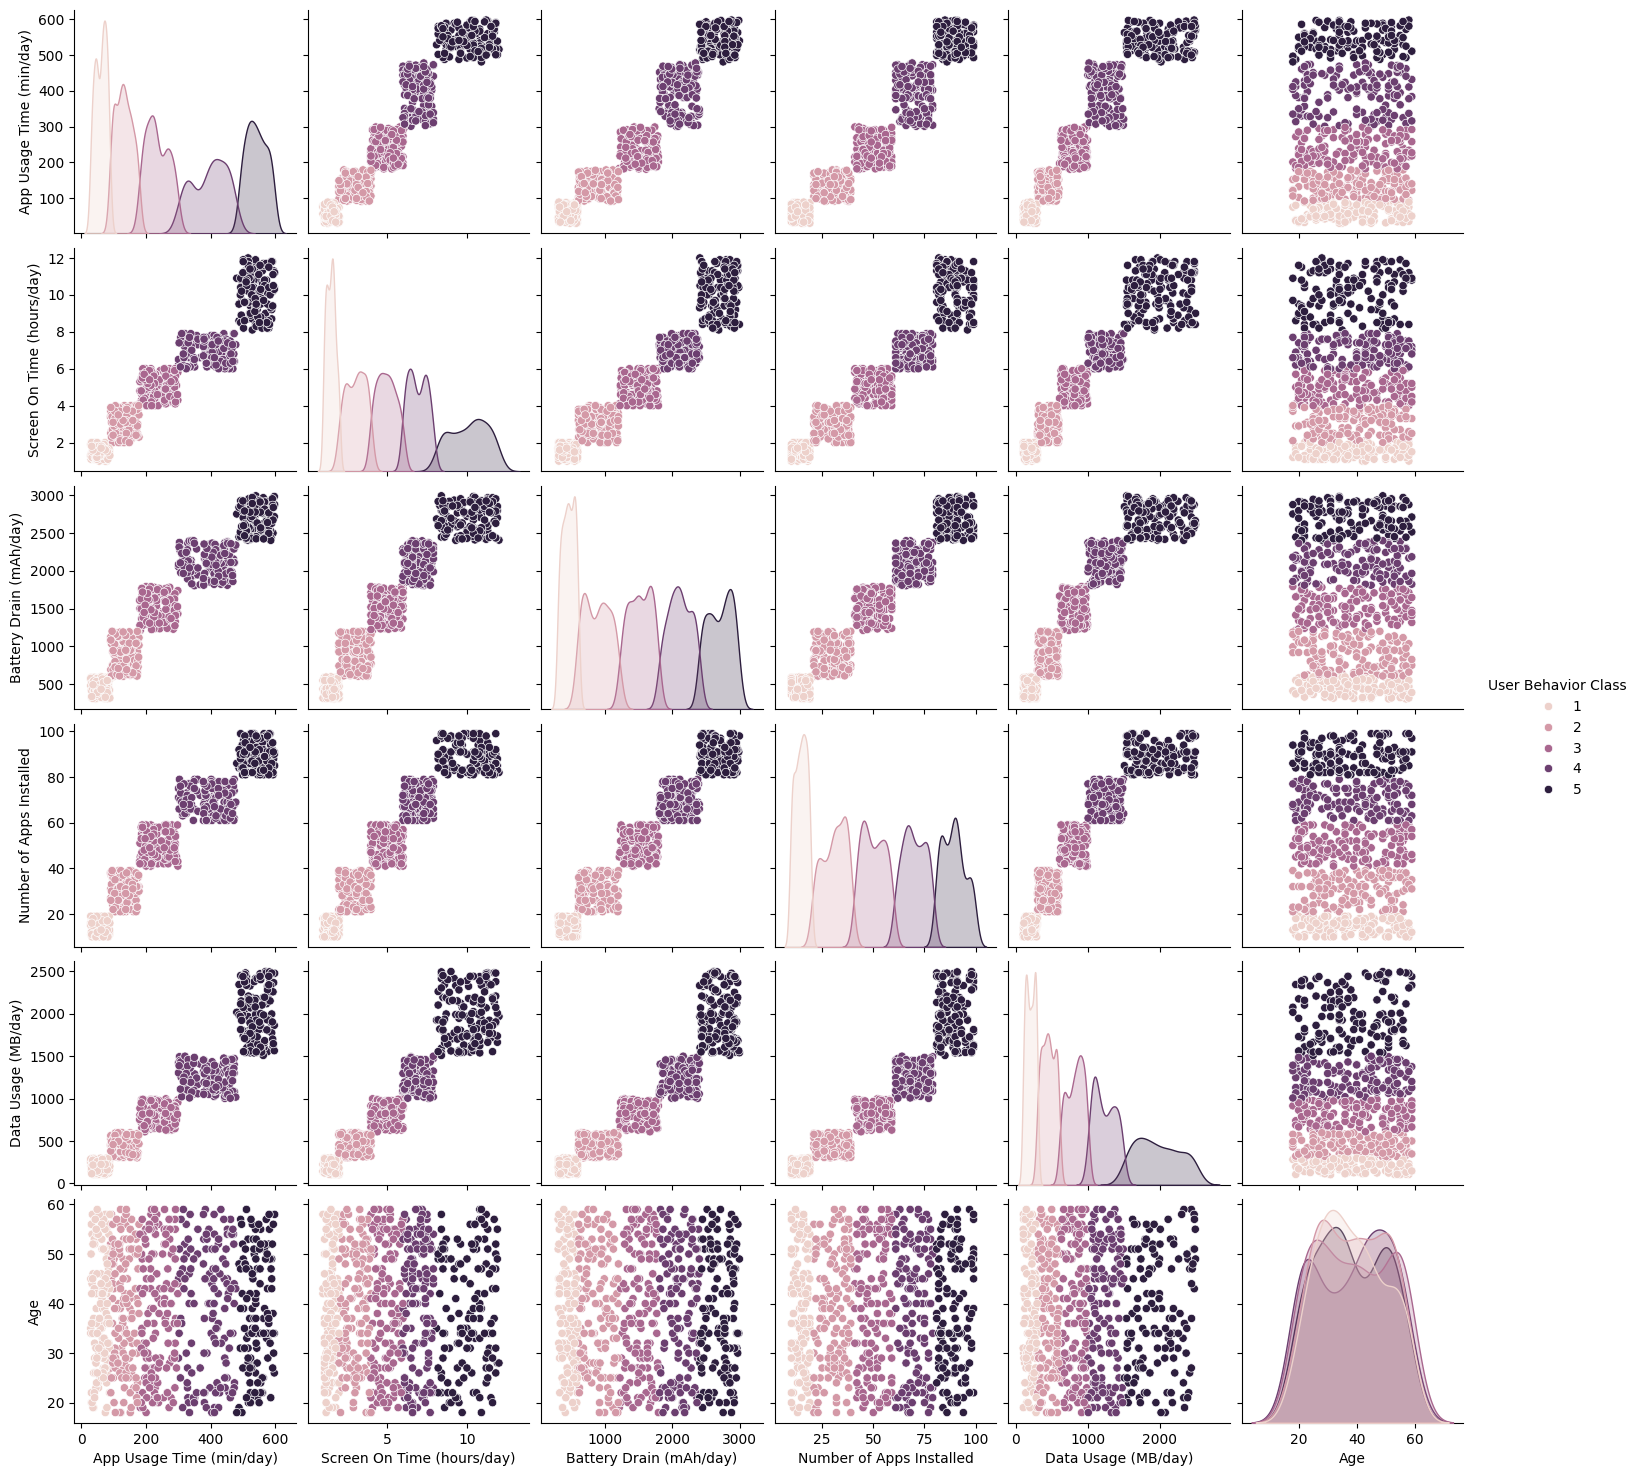

In [14]:
sns.pairplot(data=df[numeric_col_names + ['User Behavior Class']], hue='User Behavior Class')
plt.show()

We can see that classes are very well clustered making the classification easier.